In [1]:
from pathlib import Path
import os
%autoreload 2
import src.utils as utils
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
os.getcwd()

'/Users/bpedigo/JHU_code/maggot_models/maggot_models/notebooks'

In [2]:
experiment = "drosophila-2-rdpg-sbm"
run = 1
exp_path = Path(f"../models/runs/{experiment}/{run}")
run_path = exp_path / "run.json"
config_path = exp_path / "config.json"

config = utils.get_json(config_path)
print(f"Experiment: {experiment}")
print(f"Run: {run}")
print()
print("Experiment configuration:")
print()
for key, value in config.items():
    if not key == "__doc__":
        print(key)
        print(value)
        print()

dfs = utils.run_to_df(run_path)
sbm_df = dfs[0]
rdpg_df = dfs[1]

Experiment: drosophila-2-rdpg-sbm
Run: 1

Experiment configuration:

directed
True

n_block_try_range
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

n_components_try_range
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

n_components_try_rdpg
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

n_sims_sbm
50

seed
791104123



In [3]:
rdpg_df.head()

,directed,mse,n_components_try,n_params,rss,score
0,True,0.070606,1.0,418.0,3069.390125,-4775.165417
1,True,0.061434,2.0,836.0,2670.641738,NaN
10,True,0.040631,11.0,4598.0,1766.329478,NaN
11,True,0.039386,12.0,5016.0,1712.209040,NaN
2,True,0.053011,3.0,1254.0,2304.472540,NaN


In [4]:
sbm_df.head()

,mse,n_block_try,n_components_try,n_params_gmm,n_params_sbm,rss,score,sim_ind
0,0.166239,1.0,1.0,5.0,1.0,3613.379594,-11221.955282,0
1,0.129570,2.0,1.0,11.0,3.0,2816.328536,-9348.767178,0
10,0.166239,1.0,2.0,14.0,1.0,3613.379594,-11221.955282,0
100,0.166239,1.0,11.0,275.0,1.0,3613.379594,-11221.955282,0
1000,0.166239,1.0,5.0,65.0,1.0,3613.379594,-11221.955282,8


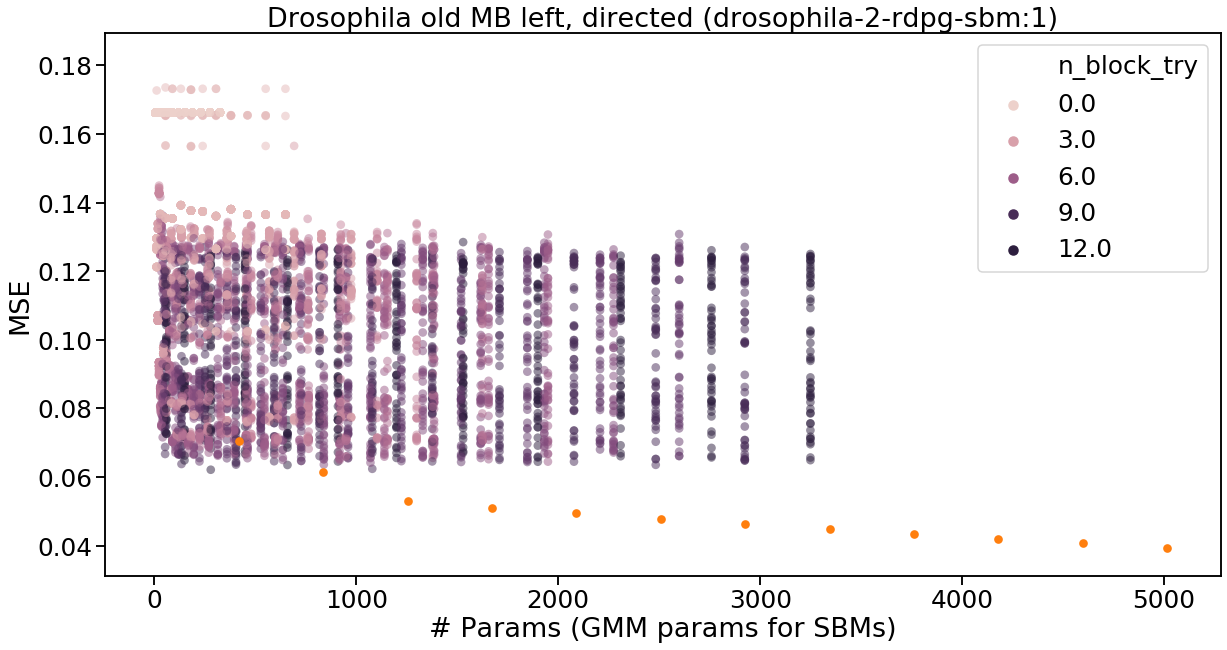

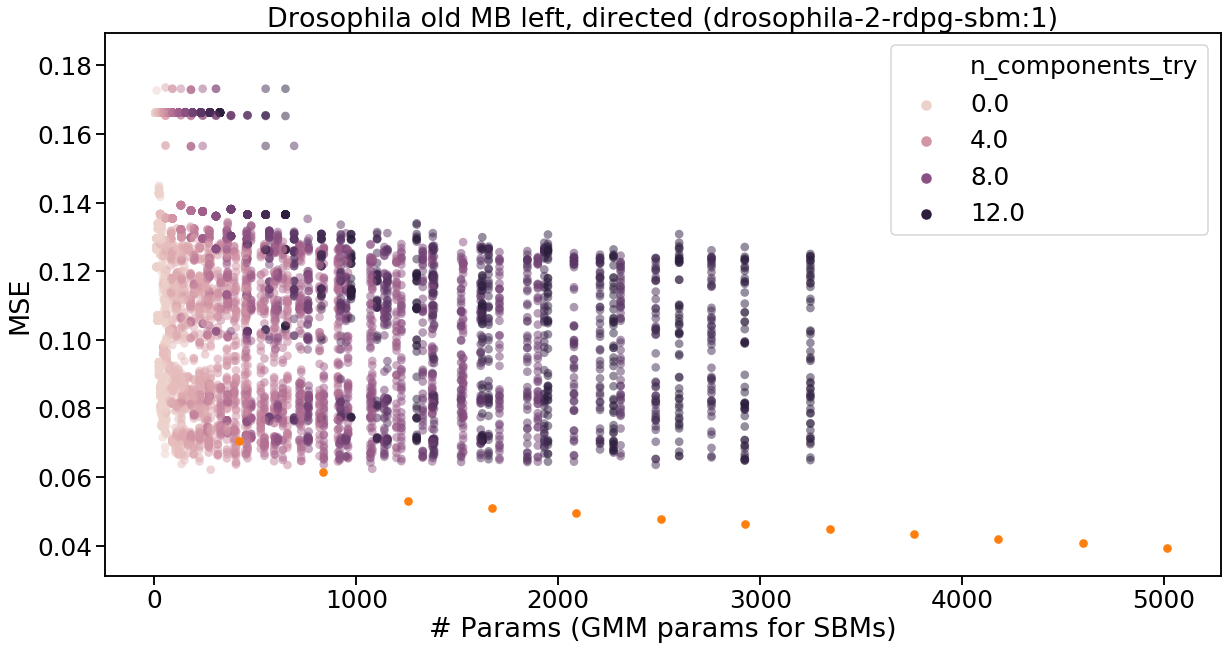

In [5]:
sns.set_context("talk", font_scale=1.5)
plt_kws = dict(s=75, linewidth=0, legend='brief')

plt.figure(figsize=(20,10))
sns.scatterplot(data=sbm_df, x="n_params_gmm", y="mse", hue="n_block_try", **plt_kws, alpha=0.5)
sns.scatterplot(data=rdpg_df, x="n_params", y="mse", **plt_kws)
plt.xlabel("# Params (GMM params for SBMs)")
plt.ylabel("MSE")
plt.title(f"Drosophila old MB left, directed ({experiment}:{run})");

plt.figure(figsize=(20,10))
sns.scatterplot(data=sbm_df, x="n_params_gmm", y="mse", hue="n_components_try", **plt_kws, alpha=0.5)
sns.scatterplot(data=rdpg_df, x="n_params", y="mse", **plt_kws)
plt.xlabel("# Params (GMM params for SBMs)")
plt.ylabel("MSE")
plt.title(f"Drosophila old MB left, directed ({experiment}:{run})");